In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import savefig
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

import seaborn as sns
sns.set_style("ticks")
sns.set_context(context='paper',font_scale=1.2)
sns.despine()

import yaml
import os
from sklearn.model_selection import ParameterGrid
import warnings
warnings.filterwarnings('ignore')

<Figure size 432x288 with 0 Axes>

In [2]:
model_path = '/local-scratch/nigam/projects/jlemmon/cl-clmbr/experiments/main/artifacts/models'
results_path = '/local-scratch/nigam/projects/jlemmon/cl-clmbr/experiments/main/artifacts/results'
figure_path = '/local-scratch/nigam/projects/jlemmon/cl-clmbr/experiments/main/notebooks/figures'

In [3]:
# Get baseline model
bl_df = pd.read_csv(f'{results_path}/clmbr/pretrained/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/test_align_vals.csv')
bl_align_vals = sorted(bl_df.to_numpy()[:,1])
# Get best CL model by validation score for each task
rd_df = pd.read_csv(f'{results_path}/clmbr/contrastive_learn/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_3000_lr_0.001_temp_0.01_pool_rand_day/test_align_vals.csv')
rd_align_vals = sorted(rd_df.to_numpy()[:,1])
# Get best CL model by validation score for each task
mr_df = pd.read_csv(f'{results_path}/clmbr/contrastive_learn/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_3000_lr_0.001_temp_0.01_pool_mean_rep/test_align_vals.csv')
mr_align_vals = sorted(mr_df.to_numpy()[:,1])

In [4]:
# Get baseline model
bl_df = pd.read_csv(f'{results_path}/clmbr/pretrained/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/test_align_vals_neg.csv')
bl_align_vals_neg = sorted(bl_df.to_numpy()[:,1])
# Get best CL model by validation score for each task
rd_df = pd.read_csv(f'{results_path}/clmbr/contrastive_learn/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_3000_lr_0.001_temp_0.01_pool_rand_day/test_align_vals_neg.csv')
rd_align_vals_neg = sorted(rd_df.to_numpy()[:,1])
# Get best CL model by validation score for each task
mr_df = pd.read_csv(f'{results_path}/clmbr/contrastive_learn/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_3000_lr_0.001_temp_0.01_pool_mean_rep/test_align_vals_neg.csv')
mr_align_vals_neg = sorted(mr_df.to_numpy()[:,1])

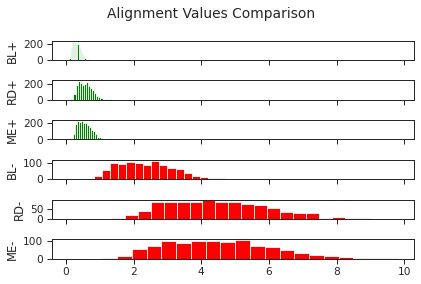

In [9]:
n_bins = 20
fig, axes = plt.subplots(6,1, sharex=True, tight_layout=True)
fig.suptitle('Alignment Values Comparison')
axes[0].hist(bl_align_vals, bins=n_bins, color='green')
axes[0].set_ylabel('BL+')
axes[1].hist(rd_align_vals, bins=n_bins, color='green')
axes[1].set_ylabel('RD+')
axes[2].hist(mr_align_vals, bins=n_bins, color='green')
axes[2].set_ylabel('ME+')
axes[3].hist(bl_align_vals_neg, bins=n_bins, color='red')
axes[3].set_ylabel('BL-')
axes[4].hist(rd_align_vals_neg, bins=n_bins, color='red')
axes[4].set_ylabel('RD-')
axes[5].hist(mr_align_vals_neg, bins=n_bins, color='red')
axes[5].set_ylabel('ME-')
plt.savefig('figures/align_hist.png', bbox_inches='tight')

In [11]:
# Get baseline model
bl_df = pd.read_csv(f'{results_path}/clmbr/pretrained/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/test_uniform_vals.csv')
bl_uni_vals = sorted(bl_df.to_numpy()[:,1])
# Get best CL model by validation score for each task
rd_df = pd.read_csv(f'{results_path}/clmbr/contrastive_learn/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_3000_lr_0.001_temp_0.01_pool_rand_day/test_uniform_vals.csv')
rd_uni_vals = sorted(rd_df.to_numpy()[:,1])
# Get best CL model by validation score for each task
mr_df = pd.read_csv(f'{results_path}/clmbr/contrastive_learn/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_3000_lr_0.001_temp_0.01_pool_mean_rep/test_uniform_vals.csv')
mr_uni_vals = sorted(mr_df.to_numpy()[:,1])
# Get baseline model
bl_df = pd.read_csv(f'{results_path}/clmbr/pretrained/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/test_uniform_vals_neg.csv')
bl_uni_vals_neg = sorted(bl_df.to_numpy()[:,1])
# Get best CL model by validation score for each task
rd_df = pd.read_csv(f'{results_path}/clmbr/contrastive_learn/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_3000_lr_0.001_temp_0.01_pool_rand_day/test_uniform_vals_neg.csv')
rd_uni_vals_neg = sorted(rd_df.to_numpy()[:,1])
# Get best CL model by validation score for each task
mr_df = pd.read_csv(f'{results_path}/clmbr/contrastive_learn/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_3000_lr_0.001_temp_0.01_pool_mean_rep/test_uniform_vals_neg.csv')
mr_uni_vals_neg = sorted(mr_df.to_numpy()[:,1])

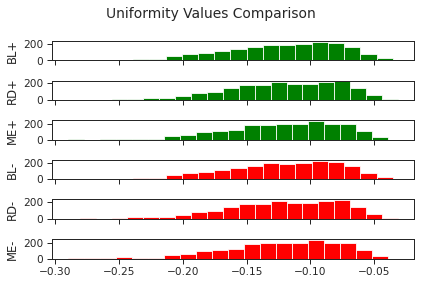

In [12]:
n_bins = 20
fig, axes = plt.subplots(6,1, sharex=True, tight_layout=True)
fig.suptitle('Uniformity Values Comparison')
axes[0].hist(bl_uni_vals, bins=n_bins, color='green')
axes[0].set_ylabel('BL+')
axes[1].hist(rd_uni_vals, bins=n_bins, color='green')
axes[1].set_ylabel('RD+')
axes[2].hist(mr_uni_vals, bins=n_bins, color='green')
axes[2].set_ylabel('ME+')
axes[3].hist(bl_uni_vals, bins=n_bins, color='red')
axes[3].set_ylabel('BL-')
axes[4].hist(rd_uni_vals, bins=n_bins, color='red')
axes[4].set_ylabel('RD-')
axes[5].hist(mr_uni_vals, bins=n_bins, color='red')
axes[5].set_ylabel('ME-')
plt.savefig('figures/uni_hist.png', bbox_inches='tight')

(array([  4.,   1.,   9.,  13.,  10.,  11.,  48.,  57.,  99., 105., 116.,
        186., 189., 193., 192., 232., 196., 200., 110.,  29.]),
 array([-0.28975329, -0.27724002, -0.26472676, -0.2522135 , -0.23970023,
        -0.22718697, -0.2146737 , -0.20216044, -0.18964718, -0.17713391,
        -0.16462065, -0.15210739, -0.13959412, -0.12708086, -0.11456759,
        -0.10205433, -0.08954107, -0.0770278 , -0.06451454, -0.05200127,
        -0.03948801]),
 <BarContainer object of 20 artists>)

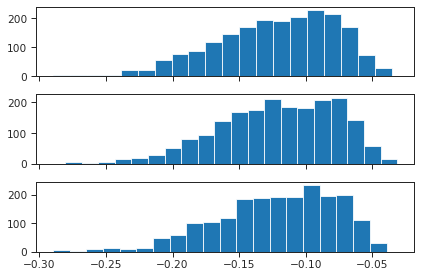

In [13]:
n_bins = 20
fig, axes = plt.subplots(3,1, sharex=True, tight_layout=True)
axes[0].hist(bl_uni_vals, bins=n_bins)
axes[1].hist(rd_uni_vals, bins=n_bins)
axes[2].hist(mr_uni_vals, bins=n_bins)